# 📥 Import Libraries & Dataset

In [581]:
# %pip install pandas
# %pip install numpy
# %pip install scikit-learn==1.5.2
# %pip install xgboost
# %pip install catboost

## 📦 Libraries

In [582]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
import networkx as nx
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

## 🗃️ Dataset

In [583]:
# Import dataset
url = "https://drive.google.com/uc?id=1wnDUJCke0araT3A7SAk8ZLTIbV00R3ev"
df = pd.read_csv(url)

# 📰 Description

## 📍 Shape

In [584]:
print("Jumlah baris: ", df.shape[0])
print("Jumlah kolom: ", df.shape[1])

Jumlah baris:  8000
Jumlah kolom:  21


## 📍 Structure

In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     8000 non-null   object 
 1   VendorID               8000 non-null   float64
 2   lpep_pickup_datetime   8000 non-null   object 
 3   lpep_dropoff_datetime  8000 non-null   object 
 4   store_and_fwd_flag     8000 non-null   object 
 5   RatecodeID             8000 non-null   float64
 6   PULocationID           8000 non-null   int64  
 7   DOLocationID           8000 non-null   int64  
 8   passenger_count        8000 non-null   float64
 9   trip_distance          8000 non-null   float64
 10  fare_amount            8000 non-null   float64
 11  extra                  8000 non-null   float64
 12  mta_tax                8000 non-null   float64
 13  tip_amount             8000 non-null   float64
 14  tolls_amount           8000 non-null   float64
 15  ehai

## 📍 Columns

In [586]:
df.columns

Index(['ID', 'VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'trip_type', 'congestion_surcharge', 'payment_type'],
      dtype='object')

Berikut ini adalah deskripsi kolom pada dataset:
- **VendorID**: Kode yang menunjukkan penyedia TPEP yang menyediakan catatan.
  - *1 = Creative Mobile Technologies, LLC*
  - *2 = VeriFone Inc*
- **lpep_pickup_datetime**: Tanggal dan waktu ketika meteran dinyalakan.
- **lpep_dropoff_datetime**: Tanggal dan waktu ketika meteran dimatikan.
- **store_and_fwd_flag**: Flag yang menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor.
  - *Y = perjalanan yang disimpan dan diteruskan*
  - *N = perjalanan yang tidak disimpan dan diteruskan*
- **RatecodeID**: Kode tarif akhir yang berlaku pada akhir perjalanan.
  - *1 = Tarif standar*
  - *2 = JFK*
  - *3 = Newark*
  - *4 = Nassau atau Westchester*
  - *5 = Tarif negosiasi*
  - *6 = Perjalanan grup*
- **PULocationID**: Zona Taksi TLC di mana meteran dinyalakan.
- **DOLocationID**: Zona Taksi TLC di mana meteran dimatikan.
- **passenger_count**: Jumlah penumpang di kendaraan. Ini adalah nilai yang dimasukkan oleh sopir.
- **trip_distance**: Jarak perjalanan yang telah dilalui dalam mil yang dilaporkan oleh meteran.
- **fare_amount**: Biaya waktu dan jarak yang dihitung oleh meteran.
- **extra**: Biaya tambahan dan surcharge (misalnya, biaya tambahan $0,50 dan $1 untuk jam sibuk dan malam hari).
- **mta_tax**: Pajak MTA sebesar 0,50 dolar yang otomatis dikenakan berdasarkan tarif meteran yang digunakan.
- **tip_amount**: Jumlah tip field ini otomatis terisi untuk tip kartu kredit. Tip tunai tidak termasuk.
- **tolls_amount**: Jumlah total semua tol yang dibayar selama perjalanan.
- **improvement_surcharge**: Biaya perbaikan sebesar $0,30 yang dikenakan pada awal perjalanan. Biaya ini mulai diterapkan pada tahun 2015.
- **total_amount**: Jumlah total yang dibebankan kepada penumpang (tidak termasuk tip tunai).
- **payment_type**: Kode numerik yang menunjukkan bagaimana penumpang membayar perjalanan.
  - *1 = Kartu kredit*
  - *2 = Tunai*
- **trip_type**: Jenis perjalanan.
  - *1 = Inner city*
  - *2 = Outer city*
- **congestion_surcharge**: Jumlah total yang dikumpulkan untuk surcharge kemacetan NYC selama perjalanan.

## 📍 Overview

In [587]:
df.head()

,ID,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,trip_type,congestion_surcharge,payment_type
0,T03315,2.0,2021-07-02 17:19:11,2021-07-02 17:40:02,N,1.0,152,142,1.0,4.30,...,1.0,0.5,5.00,0.00,NaN,0.3,27.55,1.0,2.75,1.0
1,T07720,2.0,2021-07-05 22:48:04,2021-07-05 23:12:02,N,1.0,93,107,2.0,13.52,...,0.5,0.5,12.15,6.55,NaN,0.3,60.75,1.0,2.75,1.0
2,T09695,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,N,1.0,74,75,1.0,1.55,...,0.0,0.5,0.00,0.00,NaN,0.3,8.80,1.0,0.00,2.0
3,T08802,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,N,1.0,226,129,1.0,1.22,...,0.0,0.5,0.00,0.00,NaN,0.3,8.80,1.0,0.00,2.0
4,T01413,2.0,2021-07-01 17:09:07,2021-07-01 18:03:12,N,1.0,55,86,1.0,14.23,...,1.0,0.5,0.00,2.45,NaN,0.3,49.75,1.0,0.00,1.0


In [588]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,trip_type,congestion_surcharge,payment_type
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,0.0,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,1.833250,1.176375,98.700125,134.694875,1.270125,3.459532,14.995941,0.330781,0.475875,1.277159,0.351390,NaN,0.296887,18.237415,1.037875,0.599500,1.427625
std,0.372776,0.813541,64.792549,77.750038,0.917885,4.601964,14.543702,0.626111,0.113664,2.476832,1.503395,NaN,0.038558,16.126335,0.190906,1.136344,0.517972
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,-25.000000,-1.000000,-0.500000,-1.140000,0.000000,NaN,-0.300000,-28.550000,1.000000,-2.750000,1.000000
25%,2.000000,1.000000,55.000000,74.000000,1.000000,1.030000,7.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,8.800000,1.000000,0.000000,1.000000
50%,2.000000,1.000000,75.000000,135.000000,1.000000,1.930000,10.200000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,13.300000,1.000000,0.000000,1.000000
75%,2.000000,1.000000,129.000000,212.000000,1.000000,3.790000,16.500000,0.500000,0.500000,2.040000,0.000000,NaN,0.300000,20.800000,1.000000,0.000000,2.000000
max,2.000000,5.000000,265.000000,265.000000,6.000000,37.600000,156.000000,4.500000,0.500000,47.880000,13.750000,NaN,0.300000,207.480000,2.000000,2.750000,4.000000


# 🛠️ Data Pre-Processing

## 📍 Duplicate Data

In [589]:
# Cek duplikat data
print("Jumlah duplikasi data: ", df.duplicated().sum())

Jumlah duplikasi data:  0


## 📍 Missing Values

In [590]:
# Threshold
MISSING_THRESHOLD = df.shape[0] * 0.5

missing_counts = df.isna().sum().sort_values(ascending=False)
present_counts = df.notna().sum()
missing_percentage = (missing_counts / df.shape[0] * 100).round(2)

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Present Values': present_counts,
    'Missing Percent': missing_percentage
})

missing_data_summary[missing_data_summary['Missing Values'] > MISSING_THRESHOLD]

,Missing Values,Present Values,Missing Percent
ehail_fee,8000,0,100.0


In [591]:
# Drop ehail_fee
df = df.drop(columns=['ehail_fee'], axis=1)

In [592]:
# Drop payment_type diluar 1, 2
df = df[df['payment_type'].isin([1, 2])]

In [593]:
df.head()

,ID,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,payment_type
0,T03315,2.0,2021-07-02 17:19:11,2021-07-02 17:40:02,N,1.0,152,142,1.0,4.30,18.0,1.0,0.5,5.00,0.00,0.3,27.55,1.0,2.75,1.0
1,T07720,2.0,2021-07-05 22:48:04,2021-07-05 23:12:02,N,1.0,93,107,2.0,13.52,38.0,0.5,0.5,12.15,6.55,0.3,60.75,1.0,2.75,1.0
2,T09695,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,N,1.0,74,75,1.0,1.55,8.0,0.0,0.5,0.00,0.00,0.3,8.80,1.0,0.00,2.0
3,T08802,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,N,1.0,226,129,1.0,1.22,8.0,0.0,0.5,0.00,0.00,0.3,8.80,1.0,0.00,2.0
4,T01413,2.0,2021-07-01 17:09:07,2021-07-01 18:03:12,N,1.0,55,86,1.0,14.23,45.5,1.0,0.5,0.00,2.45,0.3,49.75,1.0,0.00,1.0


# 🛠️ Clustering

## 📍 Encoding

In [594]:
# Encoding store_and_fwd_flag
label_encoder = LabelEncoder()

df["store_and_fwd_flag"] = label_encoder.fit_transform(df["store_and_fwd_flag"])

In [595]:
# Convert datetime
df['pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [596]:
# Extract time-based features
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['pickup_datetime'].dt.month
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_day'] = df['dropoff_datetime'].dt.dayofweek
df['dropoff_month'] = df['dropoff_datetime'].dt.month

In [597]:
# Create trip_duration column
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

In [598]:
def encode_cyclical(df, feature, max_val):
    df[f'{feature}_sin'] = np.sin(2 * np.pi * df[feature] / max_val)
    df[f'{feature}_cos'] = np.cos(2 * np.pi * df[feature] / max_val)

In [599]:
# Cyclinical encoding hour and month
encode_cyclical(df, 'pickup_hour', 24)
encode_cyclical(df, 'dropoff_hour', 24)
encode_cyclical(df, 'pickup_month', 12)
encode_cyclical(df, 'dropoff_month', 12)

In [600]:
# Drop unnecessary columns
df = df.drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'pickup_datetime', 'dropoff_datetime'], axis=1)

In [601]:
# # One Hot Encoding Day
# pickup_day_one_hot = pd.get_dummies(df['pickup_day'], prefix='pickup_day', drop_first=True).astype(int)
# dropoff_day_one_hot = pd.get_dummies(df['dropoff_day'], prefix='dropoff_day', drop_first=True).astype(int)

In [602]:
# df = pd.concat([df, pickup_day_one_hot, dropoff_day_one_hot], axis=1)

In [603]:
# # Drop unnecessary columns
# df = df.drop(columns=['pickup_day', 'dropoff_day'], axis=1)

In [604]:
df.head()

,ID,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,dropoff_month,trip_duration,pickup_hour_sin,pickup_hour_cos,dropoff_hour_sin,dropoff_hour_cos,pickup_month_sin,pickup_month_cos,dropoff_month_sin,dropoff_month_cos
0,T03315,2.0,0,1.0,152,142,1.0,4.30,18.0,1.0,...,7,20.850000,-0.965926,-2.588190e-01,-0.965926,-2.588190e-01,-0.5,-0.866025,-0.5,-0.866025
1,T07720,2.0,0,1.0,93,107,2.0,13.52,38.0,0.5,...,7,23.966667,-0.500000,8.660254e-01,-0.258819,9.659258e-01,-0.5,-0.866025,-0.5,-0.866025
2,T09695,2.0,0,1.0,74,75,1.0,1.55,8.0,0.0,...,7,8.983333,1.000000,6.123234e-17,1.000000,6.123234e-17,-0.5,-0.866025,-0.5,-0.866025
3,T08802,2.0,0,1.0,226,129,1.0,1.22,8.0,0.0,...,7,9.933333,-0.707107,-7.071068e-01,-0.707107,-7.071068e-01,-0.5,-0.866025,-0.5,-0.866025
4,T01413,2.0,0,1.0,55,86,1.0,14.23,45.5,1.0,...,7,54.083333,-0.965926,-2.588190e-01,-1.000000,-1.836970e-16,-0.5,-0.866025,-0.5,-0.866025


## 📍 Outlier Handling

In [605]:
# Cek Outlier
import numpy as np

def check_outlier(df):
    # Pilih hanya kolom numerik
    numeric_df = df.select_dtypes(include=np.number)

    # Hitung Q1 dan Q3
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)

    # Hitung IQR dan batas bawah/atas
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Deteksi outlier
    outliers = (numeric_df < lower_limit) | (numeric_df > upper_limit)

    # Tampilkan jumlah outlier untuk setiap kolom
    print("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

outliers = check_outlier(df)

Outlier pada tiap atribut:
VendorID                 1293
store_and_fwd_flag         34
RatecodeID                371
PULocationID              567
DOLocationID                0
passenger_count           998
trip_distance             798
fare_amount               722
extra                     270
mta_tax                   337
tip_amount                353
tolls_amount              439
improvement_surcharge      32
total_amount              687
trip_type                 300
congestion_surcharge     1745
payment_type                0
pickup_hour                 0
pickup_day                  0
pickup_month                9
dropoff_hour                0
dropoff_day                 0
dropoff_month               9
trip_duration             687
pickup_hour_sin             0
pickup_hour_cos             0
dropoff_hour_sin            0
dropoff_hour_cos            0
pickup_month_sin            9
pickup_month_cos            9
dropoff_month_sin           9
dropoff_month_cos           9
dtype: int64


In [606]:
df

,ID,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,dropoff_month,trip_duration,pickup_hour_sin,pickup_hour_cos,dropoff_hour_sin,dropoff_hour_cos,pickup_month_sin,pickup_month_cos,dropoff_month_sin,dropoff_month_cos
0,T03315,2.0,0,1.0,152,142,1.0,4.30,18.0,1.00,...,7,20.850000,-0.965926,-2.588190e-01,-0.965926,-2.588190e-01,-0.5,-0.866025,-0.5,-0.866025
1,T07720,2.0,0,1.0,93,107,2.0,13.52,38.0,0.50,...,7,23.966667,-0.500000,8.660254e-01,-0.258819,9.659258e-01,-0.5,-0.866025,-0.5,-0.866025
2,T09695,2.0,0,1.0,74,75,1.0,1.55,8.0,0.00,...,7,8.983333,1.000000,6.123234e-17,1.000000,6.123234e-17,-0.5,-0.866025,-0.5,-0.866025
3,T08802,2.0,0,1.0,226,129,1.0,1.22,8.0,0.00,...,7,9.933333,-0.707107,-7.071068e-01,-0.707107,-7.071068e-01,-0.5,-0.866025,-0.5,-0.866025
4,T01413,2.0,0,1.0,55,86,1.0,14.23,45.5,1.00,...,7,54.083333,-0.965926,-2.588190e-01,-1.000000,-1.836970e-16,-0.5,-0.866025,-0.5,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,T01462,1.0,0,1.0,75,74,1.0,1.40,6.5,1.00,...,7,5.866667,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-0.5,-0.866025,-0.5,-0.866025
7996,T06004,1.0,0,1.0,74,164,2.0,4.50,16.5,2.75,...,7,18.000000,-0.866025,-5.000000e-01,-0.965926,-2.588190e-01,-0.5,-0.866025,-0.5,-0.866025
7997,T05528,2.0,0,1.0,41,42,1.0,0.77,5.0,0.00,...,7,3.883333,0.707107,-7.071068e-01,0.707107,-7.071068e-01,-0.5,-0.866025,-0.5,-0.866025
7998,T05880,2.0,0,1.0,244,233,1.0,8.39,25.0,0.00,...,7,17.816667,-0.500000,-8.660254e-01,-0.500000,-8.660254e-01,-0.5,-0.866025,-0.5,-0.866025


In [607]:
# Outlier Handling dengan IQR
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Instead of removing, cap the values
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

numerical_columns = df.select_dtypes(include=[np.number]).columns
df = handle_outliers(df, numerical_columns)

In [608]:
# Cek outliers
outliers = check_outlier(df)

Outlier pada tiap atribut:
VendorID                 0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
trip_type                0
congestion_surcharge     0
payment_type             0
pickup_hour              0
pickup_day               0
pickup_month             0
dropoff_hour             0
dropoff_day              0
dropoff_month            0
trip_duration            0
pickup_hour_sin          0
pickup_hour_cos          0
dropoff_hour_sin         0
dropoff_hour_cos         0
pickup_month_sin         0
pickup_month_cos         0
dropoff_month_sin        0
dropoff_month_cos        0
dtype: int64


In [609]:
df = df.drop(columns=['ID'], axis=1)

In [610]:
df.columns

Index(['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_type',
       'congestion_surcharge', 'payment_type', 'pickup_hour', 'pickup_day',
       'pickup_month', 'dropoff_hour', 'dropoff_day', 'dropoff_month',
       'trip_duration', 'pickup_hour_sin', 'pickup_hour_cos',
       'dropoff_hour_sin', 'dropoff_hour_cos', 'pickup_month_sin',
       'pickup_month_cos', 'dropoff_month_sin', 'dropoff_month_cos'],
      dtype='object')

## 📍 Hierarchial Clustering



In [611]:
# Create peak_hour
df['peak_hour'] = 0
peak_hours = set(range(7, 10)).union(set(range(17, 20)))
df.loc[df['pickup_hour'].isin(peak_hours), 'peak_hour'] = 1

# Select features
features = ['extra', 'trip_distance', 'peak_hour']
X = df[features]

In [612]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [613]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

Z = hierarchy.linkage(X_scaled, method='complete', metric='euclidean')

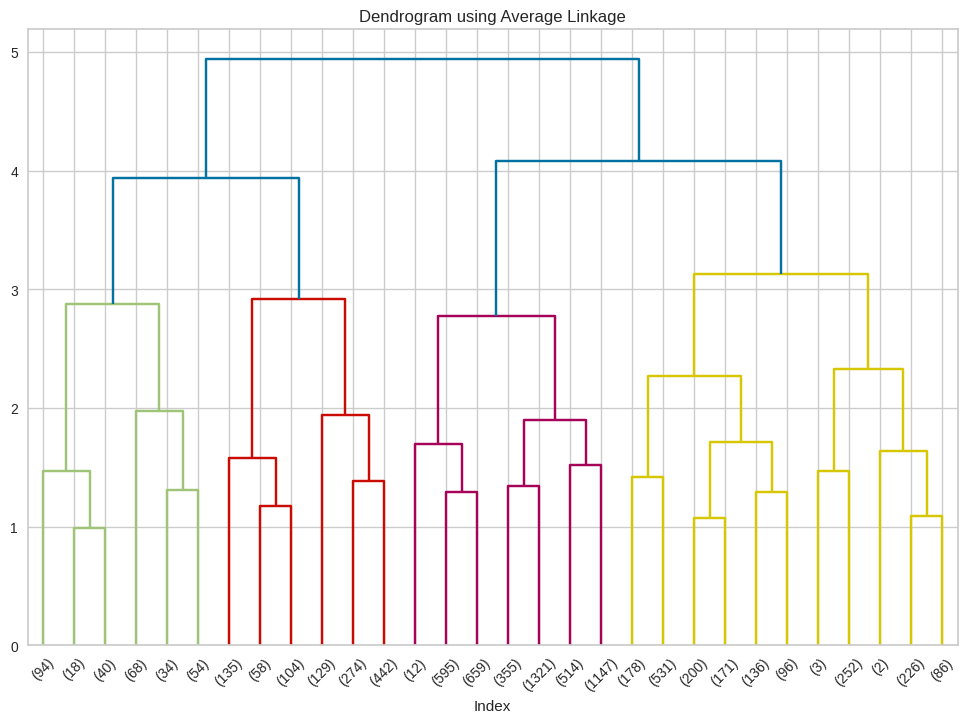

In [614]:
plt.figure(figsize=(12, 8))
hierarchy.dendrogram(Z, truncate_mode='lastp')
plt.title('Dendrogram using Average Linkage')
plt.xlabel('Index')
# plt.ylabel('Distance')
# plt.tight_layout()
plt.show()

In [615]:
n_clusters = 2
clustering_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
labels = clustering_model.fit_predict(X_scaled)

In [616]:
df['Cluster'] = labels

In [617]:
cluster_stats = df.groupby('Cluster').agg({
    'extra': ['mean', 'std'],
    'trip_distance': ['mean', 'std'],
    'peak_hour': ['mean', 'std'],
}).round(2)

cluster_stats

extra       trip_distance       peak_hour      
         mean   std          mean   std      mean   std
Cluster                                                
0        1.05  0.10          2.79  2.19      0.69  0.46
1        0.11  0.21          6.15  1.72      0.30  0.46
2        0.10  0.20          1.41  0.91      0.28  0.45

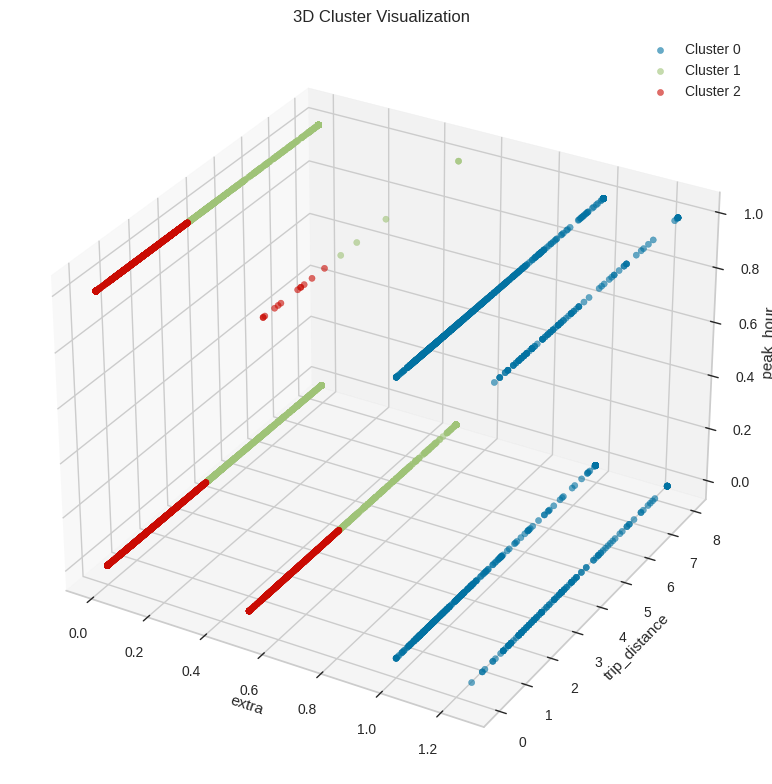

Cluster Characteristics:
        extra       trip_distance       peak_hour      
         mean   std          mean   std      mean   std
Cluster                                                
0        1.05  0.10          2.79  2.19      0.69  0.46
1        0.11  0.21          6.15  1.72      0.30  0.46
2        0.10  0.20          1.41  0.91      0.28  0.45


In [618]:
# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Features to visualize
x_feature = 'extra'
y_feature = 'trip_distance'
z_feature = 'peak_hour'

# Plot each cluster
for cluster_id in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    ax.scatter(
        cluster_data[x_feature],
        cluster_data[y_feature],
        cluster_data[z_feature],
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )

# Set plot labels and title
ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)
ax.set_title('3D Cluster Visualization')
ax.legend()

plt.tight_layout()
plt.show()

# Display cluster characteristics
print("Cluster Characteristics:")
print(cluster_stats)

In [619]:

# # Perform hierarchical clustering with complete linkage
# hierarchial_model = AgglomerativeClustering(compute_distances=True, distance_threshold = None, n_clusters = 3, linkage = 'complete', metric = 'euclidean')
# clustering = hierarchial_model.fit(X_scaled)

# print("Cluster Values")
# pd.Series(clustering.labels_).value_counts()

In [620]:
# from mpl_toolkits.mplot3d import Axes3D

# # Visualize clusters in 3D (Optional)
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
#                      c=clustering, cmap='viridis')
# ax.set_xlabel('Extra')
# ax.set_ylabel('Trip Distance')
# ax.set_zlabel('Peak Hour')
# plt.title('Clusters in 3D Feature Space')
# plt.legend(*scatter.legend_elements(), title="Clusters")
# plt.show()

In [621]:
# # Step 6: Plot the dendrogram
# plt.figure(figsize=(10, 7))
# plot_dendrogram(hierarchial_model, truncate_mode='level', p=3)
# plt.title('Hierarchical Clustering Dendrogram (Truncated)')
# plt.xlabel('Cluster size')
# plt.ylabel('Distance')
# plt.show()

In [622]:
# cluster_pred = cluster_model.fit_predict(X_scaled)

# # Add cluster labels to the data
# data_with_clusters = pd.DataFrame(X_scaled, columns=features)
# data_with_clusters['Cluster'] = cluster_pred

# print("Cluster Assignments")
# print(data_with_clusters['Cluster'].value_counts())

# data_with_clusters

In [623]:
# # Choose three features to plot
# feature_x = 'extra'  # Replace with your feature name
# feature_y = 'trip_distance'  # Replace with your feature name
# feature_z = 'peak_hour'      # Replace with your feature name

# # Create a 3D scatter plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# for cluster_id in data_with_clusters['Cluster'].unique():
#     cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster_id]
#     ax.scatter(cluster_data[feature_x], cluster_data[feature_y], cluster_data[feature_z], label=f'Cluster {cluster_id}', alpha=0.7)

# ax.set_title('Clusters Visualization (Original Features in 3D)')
# ax.set_xlabel(feature_x)
# ax.set_ylabel(feature_y)
# ax.set_zlabel(feature_z)
# ax.legend()
# plt.show()

In [624]:
# cluster_stats = data_with_clusters.groupby('Cluster').agg({
#     'extra': ['mean', 'std'],
#     'trip_distance': ['mean', 'std'],
#     'peak_hour': ['mean', 'std'],
# }).round(2)

# cluster_stats